# NSGA-II experiment with Euclidean distance

In [1]:
import array
import random

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from deap import creator
from deap import base
from deap import tools
from deap.benchmarks.tools import hypervolume

import nsgaii.price as pr
import nsgaii.objectives as obj
import nsgaii.toolbox as tb
import nsgaii.search as sr
from nsgaii.eval import Evaluation
from nsgaii.battery import Battery

In [2]:
NDIM = 24
BOUND_LOW = 0
BOUND_UP = 10
GENS = 400
POPULATION_SIZE = 400

creator.create('FitnessMin', base.Fitness, weights=(-1.0, -1.0, -1.0, -1.0))
creator.create('Individual', array.array, typecode='d', fitness=creator.FitnessMin)

## Recommendation for average winter day

In [3]:
df = pd.read_csv('.exports/aggregations/average_winter_day.csv', delimiter=',')
actual = df['use'].as_matrix()
pv   = df['gen'].as_matrix()
print('Price of predicted solution: %f'%obj.cost_function_with_euclidean(actual, pv, None, actual)[0])

Price of predicted solution: 0.801744


In [4]:
%%time

# first of all, no battery
toolbox_wob = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, distance='euclidean')
pop_wob, logbook_wob = sr.search(toolbox_wob, gens=GENS, verbose=False)

# battery with 3 kWh
battery = Battery(3,0)
toolbox_3 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
pop_3, logbook_3 = sr.search(toolbox_3, gens=GENS, verbose=False)

# battery with 5 kWh
battery = Battery(5,0)
toolbox_5 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
pop_5, logbook_5 = sr.search(toolbox_5, gens=GENS, verbose=False)

Wall time: 1min 39s


### Average winter day, no battery

Number of solutions: 28
Lowest price solution: cost: 0.300487, distance 6.658380, diff 0.368880
Highest comfort solution: cost: 0.807042, distance 0.759141, diff 0.000044


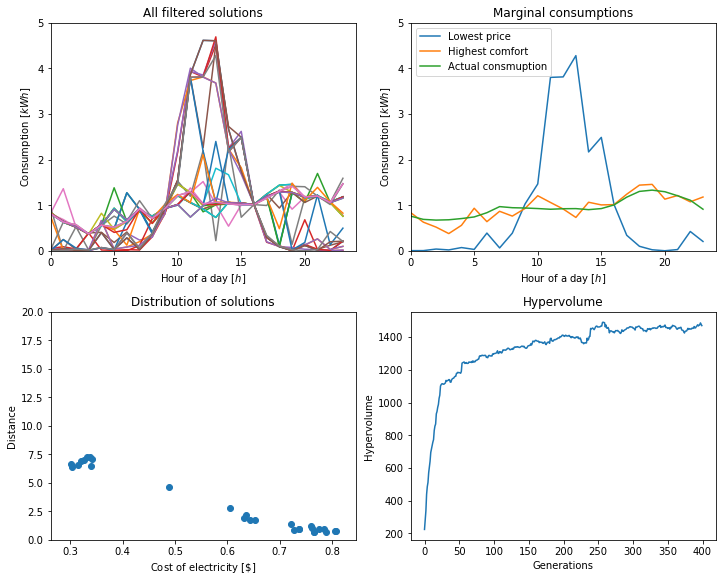

In [5]:
ev = Evaluation(pop_wob, toolbox_wob, logbook_wob, actual, distance_treshold=20)
ev.plot()
print(ev)

(array([ 30.,  35.,  36.,  27.,  16.,  15.,  10.,  12.,  11.,   8.]),
 array([ 0.04110628,  0.18209132,  0.32307636,  0.46406141,  0.60504645,
         0.74603149,  0.88701654,  1.02800158,  1.16898662,  1.30997167,
         1.45095671]),
 <a list of 10 Patch objects>)

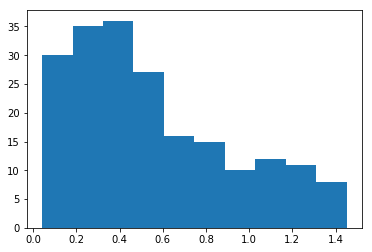

In [6]:
plt.hist(ev.objective_values[:,3])

(array([ 112.,   20.,   12.,    9.,    7.,    7.,    6.,    8.,    9.,   10.]),
 array([  1.58577536e-08,   4.53865510e+01,   9.07731019e+01,
          1.36159653e+02,   1.81546204e+02,   2.26932755e+02,
          2.72319306e+02,   3.17705857e+02,   3.63092408e+02,
          4.08478959e+02,   4.53865509e+02]),
 <a list of 10 Patch objects>)

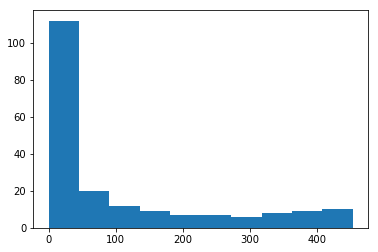

In [7]:
plt.hist(ev.objective_values[:,2])

### Average winter day, 3kWh battery

Number of solutions: 26
Lowest price solution: cost: 0.255979, distance 3.840911, diff 0.005149
Highest comfort solution: cost: 0.485868, distance 0.438986, diff 0.000427


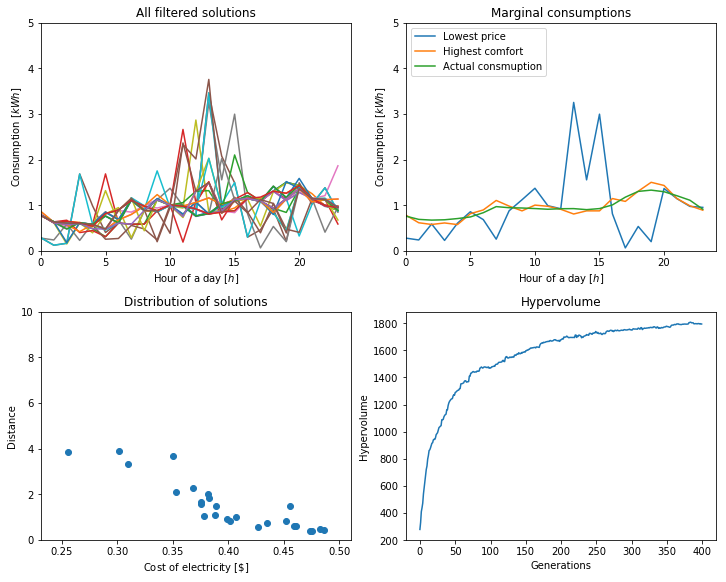

In [8]:
ev = Evaluation(pop_3, toolbox_3, logbook_3, actual, distance_treshold=10)
ev.plot()
print(ev)

### Average winter day, 5kWh battery

Number of solutions: 30
Lowest price solution: cost: 0.221034, distance 4.779240, diff 0.049741
Highest comfort solution: cost: 0.365171, distance 0.567033, diff 0.259608


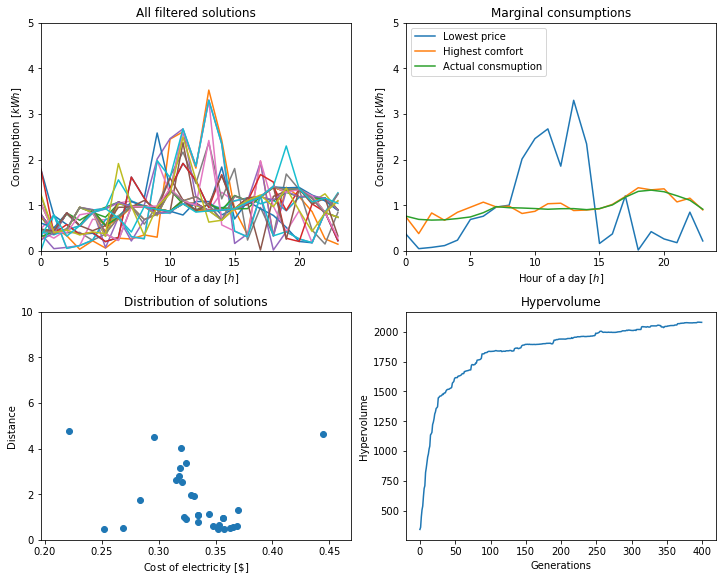

In [9]:
ev = Evaluation(pop_5, toolbox_5, logbook_5, actual, distance_treshold=10)
ev.plot()
print(ev)